In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [2]:
bottle_df = pd.read_csv("bottle.csv")
bottle_df.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


#### 1. categorical features

In [5]:
bottle_df.select_dtypes(['object']).columns

Index(['Sta_ID', 'Depth_ID', 'IncTim', 'DIC Quality Comment'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
# convert categorical values into numeric values using label encoder

#select categorical columns
bottle_df.select_dtypes(["object"]).columns 

#instatiate label encoder
le = LabelEncoder()
# use fit method to fit it on categorical column
le.fit(bottle_df['Sta_ID'])
# use transform method to apply it
bottle_df.Sta_ID = le.transform(bottle_df.Sta_ID)

In [7]:
#converting other categorical columns
le.fit(bottle_df['Depth_ID'])
bottle_df.Depth_ID = le.transform(bottle_df.Depth_ID)

#### 2. taking care of missing values

In [8]:
# percentage of missing values
total = bottle_df.isnull().sum().sort_values(ascending=False)
percent = (bottle_df.isnull().sum()/bottle_df.isnull().count()).sort_values(ascending=False)*100

missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
pH2,864853,99.998844
DIC Quality Comment,864808,99.993641
pH1,864779,99.990287
DIC2,864639,99.974100
TA2,864629,99.972944
...,...,...
RecInd,0,0.000000
Depthm,0,0.000000
Depth_ID,0,0.000000
Sta_ID,0,0.000000


In [9]:
# drop columns with more than 80% missing values
perc = 80.0
min_count = int(((100-perc)/100)*bottle_df.shape[0]+1)
drop_bottle_df = bottle_df.dropna(axis=1, thresh=min_count)

In [10]:
drop_bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
O_qual         680187
O2Satq         647066
ChlorA         639591
Chlqua         225697
Phaeop         639592
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3uM         510772
SiO3qu         353997
NO2uM          527287
NO2q           335389
NO3uM          527460
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_SIO3         510764
R_PO4          451538
R_NO3     

In [11]:
# fill missing values with the mean of that column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(fill_value =  np.nan, strategy='mean')
bottles = imputer.fit_transform(drop_bottle_df)

In [12]:
#output above returns a numpy array, so to read it, convert back to the dataframe

bottles = pd.DataFrame(bottles, columns=drop_bottle_df.columns)
bottles

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
0,1.0,1.0,312.0,0.0,0.0,10.500,33.4400,3.392468,25.64900,57.103779,...,0.000,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,0.0
1,1.0,2.0,312.0,1.0,8.0,10.460,33.4400,3.392468,25.65600,57.103779,...,0.010,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,8.0
2,1.0,3.0,312.0,2.0,10.0,10.460,33.4370,3.392468,25.65400,57.103779,...,0.020,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,10.0
3,1.0,4.0,312.0,3.0,19.0,10.450,33.4200,3.392468,25.64300,57.103779,...,0.040,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,19.0
4,1.0,5.0,312.0,4.0,20.0,10.450,33.4210,3.392468,25.64300,57.103779,...,0.040,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404.0,864859.0,1386.0,862861.0,0.0,18.744,33.4083,5.805000,23.87055,108.740000,...,0.000,5.810000,108.70000,1.800000,0.220000,0.100000,0.030000,0.910000,0.180000,0.0
864859,34404.0,864860.0,1386.0,862862.0,2.0,18.744,33.4083,5.805000,23.87072,108.740000,...,0.008,5.810000,108.70000,1.800000,0.220000,0.100000,0.030000,0.910000,0.180000,2.0
864860,34404.0,864861.0,1386.0,862863.0,5.0,18.692,33.4150,5.796000,23.88911,108.460000,...,0.020,5.800000,108.50000,1.800000,0.200000,0.100000,0.030000,0.920000,0.180000,5.0
864861,34404.0,864862.0,1386.0,862864.0,10.0,18.161,33.4062,5.816000,24.01426,107.740000,...,0.040,5.820000,107.70000,2.000000,0.250000,0.100000,0.030000,1.080000,0.310000,10.0


#### 3. train, test, split

In [13]:
# passed-in X and y arguments in train, test split, which splits X and y such that there is 30% testing data and 70%
#training data.

#extracting independent variables, so drop target (dependent variable), which is temperature
X = bottles.drop('T_degC', axis =1)
y = bottles['T_degC']


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24)

####  4. standardization

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardization is a preprocessing method used to transform continuous data to make it look normally distributed

sc = StandardScaler().fit(X_train)
sc
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Cast Dataset

In [23]:
cast_df = pd.read_csv("cast.csv")
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


### Explore cast dataset

In [24]:
# look at the columns
print(cast_df.columns) 

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')


In [26]:
#datatype of the columns
cast_df.dtypes

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object

In [27]:
#basic stats of df: mean, std, quartiles
cast_df.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [28]:
# .info() will show me how many non-null values are present in each column
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

### Cleaning mull values

In [25]:
cast_df.isnull().sum().sort_values(ascending=False).head(40)

Cruz_Leg      32940
ForelU        32327
Civil_T       32288
PST_LAN       32287
IntC14        32275
Inc_Str       32271
Inc_End       32271
TimeZone      29622
Secchi        29141
Visibility    24897
Cloud_Typ     24484
Order_Occ     24450
Wave_Prd      22770
Cloud_Amt     22522
Wave_Ht       22306
IntChl        22201
Wave_Dir      21846
Data_Or       16129
Wet_T         15415
Barometer     15341
Dry_T         15333
Distance      14690
Wea            7597
Bottom_D       2281
Ship_Name      1690
Wind_Spd       1679
Wind_Dir       1476
Time            324
Event_Num         3
DbSta_ID          0
Cast_ID           0
Sta_ID            0
Quarter           0
Cruz_Sta          0
Lat_Dec           0
Cruise            0
Sta_Code          0
Date              0
Year              0
Month             0
dtype: int64

In [29]:
# dropping columns containing eithere 70% or more NaN values
perc = 70.0
min_count = int(((100-perc)/100)*cast_df.shape[0]+1)
mod_cast_df = cast_df.dropna(axis=1, thresh=min_count)
mod_cast_df

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,NaN,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,NaN,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,30.0,10.0,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,36.0,2.0,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,7.0


In [30]:
mod_cast_df.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
Wave_Dir       21846
Wave_Ht        22306
Wave_Prd       22770
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Dry_T          15333
Wet_T          15415
Wea          

In [31]:
# fill remaining columns
cast = mod_cast_df.fillna(method = 'bfill')
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,-190.33,...,24.0,3.0,6.0,23.0,18.0,1015.2,15.6,14.0,2.0,1.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,-190.33,...,24.0,3.0,6.0,16.0,5.0,1015.2,15.6,14.0,4.0,1.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,-190.33,...,24.0,3.0,6.0,23.0,5.0,1015.2,15.6,14.0,6.0,1.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,-190.33,...,24.0,3.0,6.0,18.0,8.0,1015.2,15.6,14.0,2.0,1.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,-190.33,...,24.0,3.0,6.0,27.0,13.0,1015.2,15.6,14.0,7.0,1.0


In [32]:
#converting column types
cast[['Data_Or', 'Cruz_Num']].head(20)

,Data_Or,Cruz_Num
0,3101.0,4903
1,3101.0,4903
2,3101.0,4903
3,3101.0,4903
4,3101.0,4903
5,3101.0,4903
6,3101.0,4903
7,3101.0,4903
8,3101.0,4903
9,3101.0,4903


In [33]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
def Cast_Encoder(df):
    #object, columnsToEncode will make a list of columns that have categorical/object values
          columnsToEncode = list(cast.select_dtypes(include=['category','object']))
          # label encoder object with no parameters
          le = LabelEncoder()
          # a loop to interate over the columns from the columnsToEncode object
          for feature in columnsToEncode:
              try:
                  cast[feature] = le.fit_transform(cast[feature])
              except:
                  print('Error encoding '+feature)
          return cast

df = Cast_Encoder(cast)
df

Error encoding Data_Or
Error encoding Cruz_Num


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,0,194903,19490305400560,5400560,0,312,1,3,-190.330,...,24.0,3.0,6.0,23.0,18.0,1015.2,15.6,14.0,2.0,1.0
1,2,0,194903,19490305200750,5200750,1,272,1,3,-190.330,...,24.0,3.0,6.0,16.0,5.0,1015.2,15.6,14.0,4.0,1.0
2,3,0,194903,19490305100850,5100850,2,262,1,3,-190.330,...,24.0,3.0,6.0,23.0,5.0,1015.2,15.6,14.0,6.0,1.0
3,4,0,194903,19490305000950,5000950,3,242,1,3,-190.330,...,24.0,3.0,6.0,18.0,8.0,1015.2,15.6,14.0,2.0,1.0
4,5,0,194903,19490305001040,5001040,4,245,1,3,-190.330,...,24.0,3.0,6.0,27.0,13.0,1015.2,15.6,14.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,644,201611,20161109330900,9330900,34339,1365,4,6,-254.345,...,30.0,10.0,15.0,34.0,16.0,1017.5,17.1,16.4,1.0,6.0
34400,34401,644,201611,20161109331000,9331000,34340,1370,4,6,-294.297,...,30.0,10.0,15.0,36.0,14.0,1019.6,18.0,16.2,1.0,6.0
34401,34402,644,201611,20161109331100,9331100,34341,1372,4,6,-334.157,...,30.0,10.0,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0
34402,34403,644,201611,20161109331200,9331200,34342,1374,4,6,-373.979,...,36.0,2.0,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,7.0


## 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important? 


I ran a correlation matrix on the dataset to see which variables were highly correlated and checked which columns were  redundant. There were columns that had a perfect correlation with other variables, which meant that  they had to be dropped because those variables weren't independent of eachother.
I then used Lasso to pick the most important variables for the model. NO3uM and Depthm are the most important features in this dataset based on using lasso for feature selection.

In [31]:
#drop columns that are highly correlated
#correlated features means that they bring the same information, so it is logical to remove one of them

# Create correlation matrix
corr_matrix = bottles.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
bottles.drop(to_drop, axis=1, inplace=True)
bottles.columns

Index(['Cst_Cnt', 'Sta_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'RecInd', 'T_prec', 'S_prec', 'P_qual', 'O_qual', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM',
       'NO2q', 'NO3uM', 'NO3q', 'NH3q', 'C14A1q', 'DarkAq', 'R_DYNHT'],
      dtype='object')

In [36]:
#also dropping Sta_ID since it doesn't add any value to  predicting
dropping = ['Sta_ID']
bottles.drop(dropping, axis=1,  inplace=True)

In [37]:
corr_mat = bottles.corr()
corr_mat

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual,O_qual,O2Satq,ChlorA,Chlqua,Phaeop,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3q,C14A1q,DarkAq,R_DYNHT
Cst_Cnt,1.000000,-0.162222,0.088783,-0.189893,0.146288,-0.085748,-0.100142,0.067562,0.439404,-1.984760e-03,-0.225926,-0.202506,0.001088,-0.015951,-0.007702,-0.107521,-1.784725e-02,-0.017821,-1.726902e-02,0.000723,-0.102655,-0.000543,-0.089394,-0.175415,-3.019814e-03,-2.891050e-03,-0.132342
Depthm,-0.162222,1.000000,-0.678628,0.543326,-0.532769,0.551689,0.082316,0.019348,0.005630,7.358702e-04,0.003113,0.009469,-0.026687,0.006426,-0.019227,0.422833,-3.964627e-04,0.422060,-3.433872e-03,-0.068256,0.010228,0.304036,0.026621,0.011439,1.974856e-03,1.851367e-03,0.855839
T_degC,0.088783,-0.678628,1.000000,-0.489967,0.712731,-0.804295,-0.066060,-0.041076,-0.034964,-5.698372e-04,0.018899,0.006685,0.037420,-0.005700,0.002417,-0.602995,-3.135053e-04,-0.493519,-2.175550e-04,0.055422,-0.013233,-0.522177,-0.056844,0.000991,-4.125994e-03,-4.003478e-03,-0.774224
Salnty,-0.189893,0.543326,-0.489967,1.000000,-0.722056,0.601137,0.065183,-0.018522,-0.079280,2.057805e-03,0.017185,0.017457,-0.004761,0.008255,0.007029,0.536771,-3.504214e-03,0.473929,-1.807563e-03,-0.087157,0.017772,0.489572,0.052927,0.024364,4.036038e-03,3.875831e-03,0.664944
O2ml_L,0.146288,-0.532769,0.712731,-0.722056,1.000000,-0.674994,-0.069505,0.001016,0.023181,-1.545704e-03,0.029806,0.012210,0.091215,-0.008765,0.047384,-0.734305,1.237696e-03,-0.608572,-1.508450e-04,0.124962,-0.003445,-0.644935,-0.049195,0.011051,-4.057575e-03,-3.877570e-03,-0.671612
STheta,-0.085748,0.551689,-0.804295,0.601137,-0.674994,1.000000,0.058092,0.025533,0.006851,9.316234e-04,-0.009061,-0.006645,-0.023704,0.005852,0.008634,0.550374,-8.731353e-04,0.466522,-1.534871e-04,-0.056382,0.014783,0.502068,0.056789,0.005136,4.225238e-03,4.085901e-03,0.696870
RecInd,-0.100142,0.082316,-0.066060,0.065183,-0.069505,0.058092,1.000000,0.041301,0.349491,1.171612e-03,-0.120076,-0.060769,-0.012865,0.010242,-0.024766,0.054413,1.645435e-02,0.030790,1.187453e-02,-0.037465,0.043431,0.026558,0.034950,0.016035,2.608593e-03,2.575135e-03,0.086554
T_prec,0.067562,0.019348,-0.041076,-0.018522,0.001016,0.025533,0.041301,1.000000,0.094944,1.529885e-04,0.059334,0.045338,0.002830,0.001577,0.002367,0.011511,1.855328e-03,0.031363,1.180759e-03,-0.000376,0.007673,0.011864,0.006759,0.012343,3.363631e-04,3.391481e-04,0.017898
S_prec,0.439404,0.005630,-0.034964,-0.079280,0.023181,0.006851,0.349491,0.094944,1.000000,-8.914870e-04,-0.171195,-0.128580,-0.004495,-0.009223,-0.006946,-0.023886,-1.538396e-02,0.000008,-1.150730e-02,-0.000910,-0.047677,0.003202,-0.041824,-0.068779,-1.871308e-03,-1.887184e-03,0.018035
P_qual,-0.001985,0.000736,-0.000570,0.002058,-0.001546,0.000932,0.001172,0.000153,-0.000891,1.000000e+00,0.000141,0.000137,-0.000011,-0.000002,-0.000002,0.000057,-2.970795e-05,0.000040,-1.433187e-05,-0.000016,-0.000020,0.000033,-0.000020,-0.000001,-8.230714e-09,-4.338780e-08,0.001013


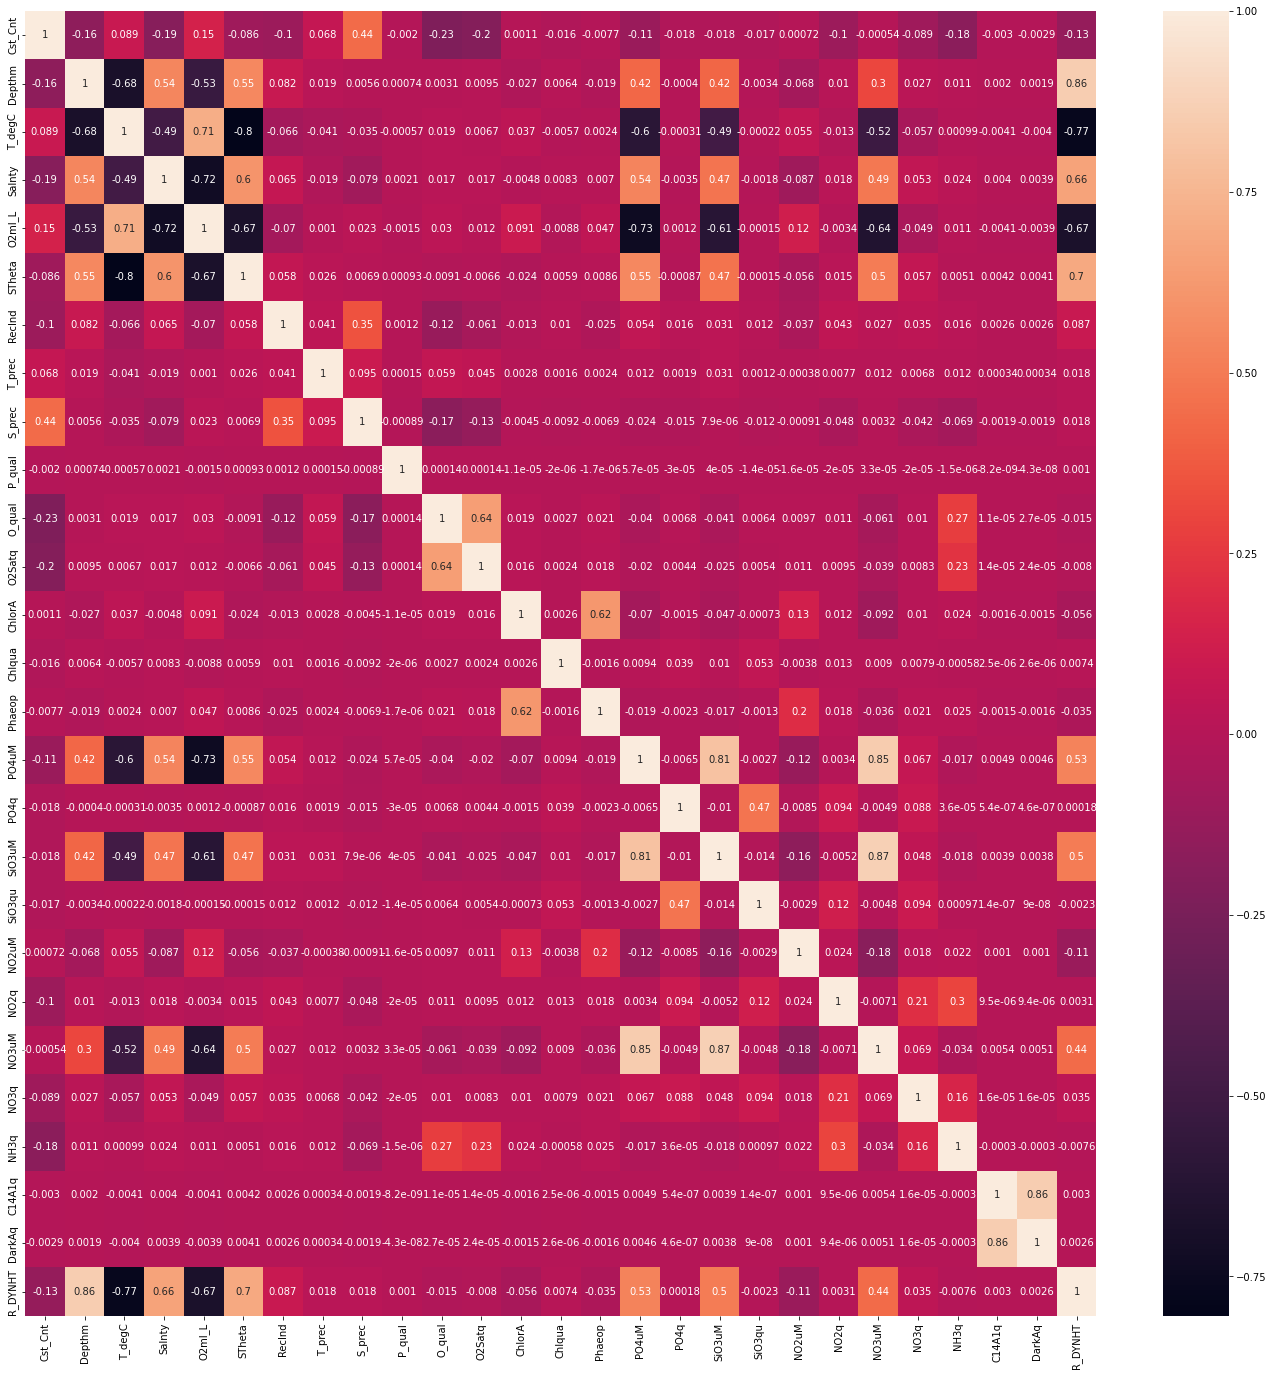

In [38]:
# visual for corr. matrix after highly correlated columns were dropped
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,24))
sn.heatmap(corr_mat, annot=True)
plt.show()

In [42]:
imp_coef = coef.sort_values()
imp_coef

NO3uM     -0.110416
Depthm    -0.008069
Cst_Cnt   -0.000004
C14A1q    -0.000000
NH3q      -0.000000
NO3q      -0.000000
NO2q      -0.000000
NO2uM     -0.000000
SiO3qu    -0.000000
SiO3uM    -0.000000
PO4q      -0.000000
PO4uM     -0.000000
Phaeop    -0.000000
Chlqua     0.000000
ChlorA    -0.000000
O2Satq     0.000000
O_qual     0.000000
P_qual    -0.000000
S_prec    -0.000000
T_prec    -0.000000
RecInd    -0.000000
STheta    -0.000000
O2ml_L     0.000000
Salnty    -0.000000
DarkAq    -0.000000
R_DYNHT   -0.000000
dtype: float64

In [ ]:
# from Ayesha
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.6)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

In [ ]:
# ayesha's code for lasso
features = Numerical_DF1.drop('T_degC', axis =1).columns

# Plot the coefficients
plt.figure(figsize=(20, 10))
plt.plot(range(len(features)), lasso_coef)
plt.xticks(range(len(features)), features.values, rotation=60)
plt.margins(0.02)
plt.show()

### Filter Method using Pearson's R for feature selection

In [22]:
#display full output
pd.set_option("display.max_rows", None, "display.max_columns", None)
# or use filter method using Pearson Correlation
corr = bottles.corr()
corr

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,O_qual,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
Cst_Cnt,1.000000,0.999345,-0.235140,0.999338,-0.162222,0.088783,-0.189893,0.146288,-0.085748,0.122815,0.132695,-0.100142,0.067562,0.439404,-1.984760e-03,-0.225926,-0.202506,0.001088,-0.015951,-0.007702,-0.016263,-0.107521,-1.784725e-02,-0.017821,-1.726902e-02,0.000723,-0.102655,-0.000543,-0.089394,-0.175415,-3.019814e-03,-3.019785e-03,-2.891050e-03,-3.050431e-03,-0.162220,0.088791,0.068047,-0.189386,-0.091365,0.102846,-0.132342,0.146307,0.120155,-0.017816,-0.107526,-0.000544,0.000803,0.001097,-0.007668,-0.161961
Btl_Cnt,0.999345,1.000000,-0.231387,0.999994,-0.161617,0.089581,-0.187243,0.144570,-0.085408,0.121268,0.130957,-0.100828,0.062489,0.438148,-2.020908e-03,-0.231308,-0.206871,0.001964,-0.015712,-0.007362,-0.016032,-0.107143,-1.773492e-02,-0.017413,-1.721813e-02,0.001843,-0.104337,0.000273,-0.090766,-0.180085,-2.905934e-03,-2.905909e-03,-2.760846e-03,-2.936104e-03,-0.161614,0.089589,0.068904,-0.186744,-0.091017,0.102529,-0.132542,0.144590,0.118613,-0.017407,-0.107148,0.000272,0.001930,0.001975,-0.007323,-0.161348
Sta_ID,-0.235140,-0.231387,1.000000,-0.231521,0.010888,0.222703,0.331992,-0.102848,-0.057324,-0.056306,-0.096535,0.007901,-0.064712,-0.165107,5.535424e-04,0.069463,0.058302,-0.020002,0.004883,-0.010898,0.004988,0.012406,1.299289e-03,-0.009443,3.043708e-03,-0.024827,0.021706,-0.014145,0.020293,0.040721,5.450466e-04,5.450341e-04,5.568154e-04,5.541520e-04,0.010888,0.222701,0.219742,0.331114,-0.058211,0.069867,0.044722,-0.102852,-0.055688,-0.009448,0.012403,-0.014150,-0.024841,-0.020006,-0.010904,0.010509
Depth_ID,0.999338,0.999994,-0.231521,1.000000,-0.161590,0.089573,-0.187288,0.144580,-0.085421,0.121269,0.130963,-0.100826,0.062332,0.438726,-2.021524e-03,-0.231519,-0.206992,0.002027,-0.015719,-0.007301,-0.016039,-0.107137,-1.777167e-02,-0.017332,-1.724199e-02,0.001915,-0.104321,0.000274,-0.090733,-0.180047,-2.916394e-03,-2.916368e-03,-2.772114e-03,-2.946649e-03,-0.161587,0.089581,0.068893,-0.186788,-0.091030,0.102538,-0.132550,0.144599,0.118613,-0.017326,-0.107142,0.000274,0.002002,0.002037,-0.007262,-0.161321
Depthm,-0.162222,-0.161617,0.010888,-0.161590,1.000000,-0.678628,0.543326,-0.532769,0.551689,-0.512682,-0.507193,0.082316,0.019348,0.005630,7.358702e-04,0.003113,0.009469,-0.026687,0.006426,-0.019227,0.006605,0.422833,-3.964627e-04,0.422060,-3.433872e-03,-0.068256,0.010228,0.304036,0.026621,0.011439,1.974856e-03,1.974816e-03,1.851367e-03,1.991535e-03,1.000000,-0.678628,-0.643655,0.541955,0.570964,-0.630283,0.855839,-0.532769,-0.511864,0.422068,0.422840,0.304043,-0.068264,-0.026688,-0.019226,0.999994
T_degC,0.088783,0.089581,0.222703,0.089573,-0.678628,1.000000,-0.489967,0.712731,-0.804295,0.745131,0.696899,-0.066060,-0.041076,-0.034964,-5.698372e-04,0.018899,0.006685,0.037420,-0.005700,0.002417,-0.005920,-0.602995,-3.135053e-04,-0.493519,-2.175550e-04,0.055422,-0.013233,-0.522177,-0.056844,0.000991,-4.125994e-03,-4.125979e-03,-4.003478e-03,-4.149016e-03,-0.678626,1.000000,0.973582,-0.488706,-0.836170,0.935155,-0.774224,0.712731,0.743683,-0.493529,-0.603006,-0.522189,0.055437,0.037424,0.002414,-0.677289
Salnty,-0.189893,-0.187243,0.331992,-0.187288,0.543326,-0.489967,1.000000,-0.722056,0.601137,-0.708407,-0.738975,0.065183,-0.018522,-0.079280,2.057805e-03,0.017185,0.017457,-0.004761,0.008255,0.007029,0.008622,0.536771,-3.504214e-03,0.473929,-1.807563e-03,-0.087157,0.017772,0.489572,0.052927,0.024364,4.036038e-03,4.036038e-03,3.875831e-03,4.063194e-03,0.543325,-0.489969,-0.503964,0.997428,0.625408,-0.695190,0.664944,-0.722057,-0.706695,0.473939,0.536784,0.489584,-0.087181,-0.004764,0.007032,0.542121
O2ml_L,0.146288,0.144570,-0.102848,0.144580,-0.532769,0.712731,-0.

In [18]:
#interpreting correlation matrix
correlation_mat = bottles.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

R_SVA        R_SIGMA       -8.981630e-01
R_SIGMA      R_SVA         -8.981630e-01
R_POTEMP     R_SIGMA       -8.628690e-01
R_SIGMA      R_POTEMP      -8.628690e-01
R_SVA        STheta        -8.600146e-01
STheta       R_SVA         -8.600146e-01
R_TEMP       R_SIGMA       -8.361713e-01
R_SIGMA      R_TEMP        -8.361713e-01
T_degC       R_SIGMA       -8.361705e-01
R_SIGMA      T_degC        -8.361705e-01
R_POTEMP     STheta        -8.281382e-01
STheta       R_POTEMP      -8.281382e-01
R_TEMP       STheta        -8.042956e-01
STheta       R_TEMP        -8.042956e-01
             T_degC        -8.042949e-01
T_degC       STheta        -8.042949e-01
R_DYNHT      R_SVA         -8.015661e-01
R_SVA        R_DYNHT       -8.015661e-01
R_POTEMP     R_DYNHT       -7.953501e-01
R_DYNHT      R_POTEMP      -7.953501e-01
R_TEMP       R_DYNHT       -7.742240e-01
R_DYNHT      R_TEMP        -7.742240e-01
T_degC       R_DYNHT       -7.742238e-01
R_DYNHT      T_degC        -7.742238e-01
R_SIGMA      O2S

In [19]:
#Correlation with output variable
cor_target = abs(corr['T_degC'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.75]
relevant_features


#The features below are highly correlated with the output variable, water temperature
# Based on the correlation matrix

T_degC      1.000000
STheta      0.804295
R_TEMP      1.000000
R_POTEMP    0.973582
R_SIGMA     0.836170
R_SVA       0.935155
R_DYNHT     0.774224
Name: T_degC, dtype: float64

In [20]:
#a list of redundant column names and highly correlated columns to drop
to_drop = ['R_TEMP', 'STheta', 'C14A1q', 'C14A2q', 'ChlorA', 'R_O2', 'R_PHAEO', 'R_PRES', 'Depth_ID', 'R_PO4', 'R_NO2', 'R_SIO3',
          'R_NO3', 'Btl_Cnt', 'Depth_ID', 'R_SALINITY', 'R_O2Sat', 'R_POTEMP', 'R_O2Sat', 'Oxy_µmol/Kg', 'R_SIGMA', 
          'R_SVA', 'R_DYNHT', 'O2Sat', 'Sta_ID']

#drop those columns from the dataset
bottles_subset = bottles.drop(to_drop, axis=1)
bottles_subset.head()

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,RecInd,T_prec,S_prec,P_qual,O_qual,O2Satq,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3q,DarkAq,MeanAq,R_Depth,R_CHLA
0,1.0,0.0,10.50,33.440,3.392468,3.0,1.0,2.0,9.0,9.0,9.0,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,9.0,9.0,9.0,0.0,0.450225
1,1.0,8.0,10.46,33.440,3.392468,3.0,2.0,2.0,9.0,9.0,9.0,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,9.0,9.0,9.0,8.0,0.450225
2,1.0,10.0,10.46,33.437,3.392468,7.0,2.0,3.0,9.0,9.0,9.0,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,9.0,9.0,9.0,10.0,0.450225
3,1.0,19.0,10.45,33.420,3.392468,3.0,2.0,2.0,9.0,9.0,9.0,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,9.0,9.0,9.0,19.0,0.450225
4,1.0,20.0,10.45,33.421,3.392468,7.0,2.0,3.0,9.0,9.0,9.0,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,9.0,9.0,9.0,20.0,0.450225


In [21]:
bottles_subset.corr()

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,RecInd,T_prec,S_prec,P_qual,O_qual,O2Satq,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3q,DarkAq,MeanAq,R_Depth,R_CHLA
Cst_Cnt,1.000000,-0.162222,0.088783,-0.189893,0.146288,-0.100142,0.067562,0.439404,-1.984760e-03,-0.225926,-0.202506,-0.015951,-0.007702,-0.016263,-0.107521,-1.784725e-02,-0.017821,-1.726902e-02,0.000723,-0.102655,-0.000543,-0.089394,-0.175415,-2.891050e-03,-3.050431e-03,-0.162220,0.001097
Depthm,-0.162222,1.000000,-0.678628,0.543326,-0.532769,0.082316,0.019348,0.005630,7.358702e-04,0.003113,0.009469,0.006426,-0.019227,0.006605,0.422833,-3.964627e-04,0.422060,-3.433872e-03,-0.068256,0.010228,0.304036,0.026621,0.011439,1.851367e-03,1.991535e-03,1.000000,-0.026688
T_degC,0.088783,-0.678628,1.000000,-0.489967,0.712731,-0.066060,-0.041076,-0.034964,-5.698372e-04,0.018899,0.006685,-0.005700,0.002417,-0.005920,-0.602995,-3.135053e-04,-0.493519,-2.175550e-04,0.055422,-0.013233,-0.522177,-0.056844,0.000991,-4.003478e-03,-4.149016e-03,-0.678626,0.037424
Salnty,-0.189893,0.543326,-0.489967,1.000000,-0.722056,0.065183,-0.018522,-0.079280,2.057805e-03,0.017185,0.017457,0.008255,0.007029,0.008622,0.536771,-3.504214e-03,0.473929,-1.807563e-03,-0.087157,0.017772,0.489572,0.052927,0.024364,3.875831e-03,4.063194e-03,0.543325,-0.004764
O2ml_L,0.146288,-0.532769,0.712731,-0.722056,1.000000,-0.069505,0.001016,0.023181,-1.545704e-03,0.029806,0.012210,-0.008765,0.047384,-0.009286,-0.734305,1.237696e-03,-0.608572,-1.508450e-04,0.124962,-0.003445,-0.644935,-0.049195,0.011051,-3.877570e-03,-4.087323e-03,-0.532769,0.091217
RecInd,-0.100142,0.082316,-0.066060,0.065183,-0.069505,1.000000,0.041301,0.349491,1.171612e-03,-0.120076,-0.060769,0.010242,-0.024766,0.010399,0.054413,1.645435e-02,0.030790,1.187453e-02,-0.037465,0.043431,0.026558,0.034950,0.016035,2.575135e-03,2.575138e-03,0.082317,-0.012865
T_prec,0.067562,0.019348,-0.041076,-0.018522,0.001016,0.041301,1.000000,0.094944,1.529885e-04,0.059334,0.045338,0.001577,0.002367,0.001601,0.011511,1.855328e-03,0.031363,1.180759e-03,-0.000376,0.007673,0.011864,0.006759,0.012343,3.391481e-04,3.391485e-04,0.019348,0.002830
S_prec,0.439404,0.005630,-0.034964,-0.079280,0.023181,0.349491,0.094944,1.000000,-8.914870e-04,-0.171195,-0.128580,-0.009223,-0.006946,-0.009365,-0.023886,-1.538396e-02,0.000008,-1.150730e-02,-0.000910,-0.047677,0.003202,-0.041824,-0.068779,-1.887184e-03,-1.887186e-03,0.005631,-0.004494
P_qual,-0.001985,0.000736,-0.000570,0.002058,-0.001546,0.001172,0.000153,-0.000891,1.000000e+00,0.000141,0.000137,-0.000002,-0.000002,-0.000002,0.000057,-2.970795e-05,0.000040,-1.433187e-05,-0.000016,-0.000020,0.000033,-0.000020,-0.000001,-4.338780e-08,-4.338818e-08,0.000736,-0.000011
O_qual,-0.225926,0.003113,0.018899,0.017185,0.029806,-0.120076,0.059334,-0.171195,1.414725e-04,1.000000,0.644868,0.002737,0.021131,0.002725,-0.040196,6.786790e-03,-0.040909,6.440276e-03,0.009654,0.011061,-0.061064,0.009970,0.268042,2.693611e-05,2.696101e-05,0.003114,0.018532


### Lasso for feature selection

In [23]:
from sklearn.linear_model import LassoCV

X = bottles_subset.drop('T_degC', axis=1)
y = bottles_subset[['T_degC']]

#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 3.834038
Best score using built-in LassoCV: 0.559656


In [24]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 23 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

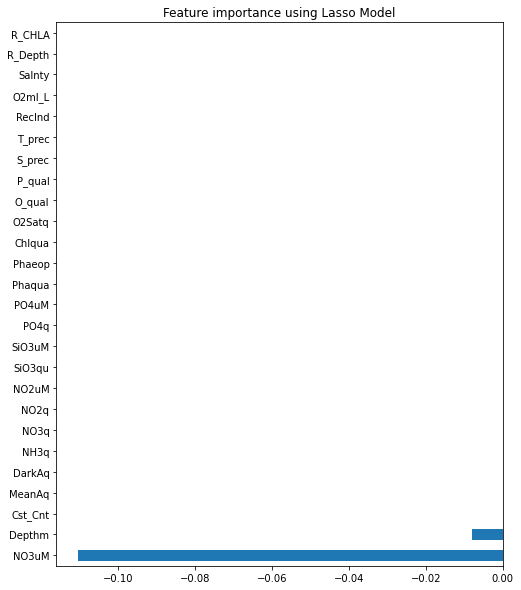

In [25]:
#https://www.yourdatateacher.com/2021/05/05/feature-selection-in-machine-learning-using-lasso-regression/
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [26]:
#feature selection to best predict water temperature
#use variables that are not highly correlated with eachother

X = bottles_subset[['NO3uM', 'Depthm']]
y = bottles_subset['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train) 

LinearRegression()

In [28]:
y_pred = regression.predict(X_test)
accuracy_score = regression.score(X_test,y_test)
accuracy_score

0.5683460304272825

In [29]:
regression.coef_

array([-0.16090004, -0.0076854 ])

#### The equation for the model is: T_degC = -0.16NO3uM + -0.007Depthm

## 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

The multiple linear regression has the best performance in comparison to the linear and polynomial regression. 

## 5.	Work with the diabetes dataset to perform multiple logistic regression. 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Using the .describe method to understand the distribution of the data. It will help analyze the distribution of the features.

In [3]:
#confirming no missing values. Even though this shows no missing values, based on the describe function, there are 
#some missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

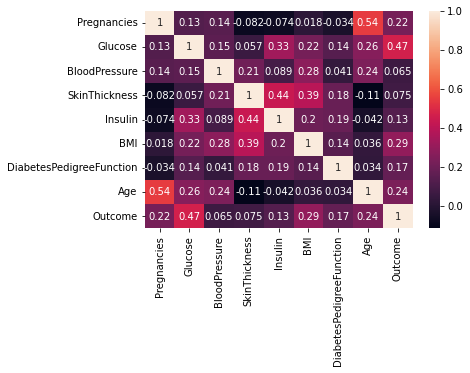

In [5]:
#print the correlation matrix with Pearson correlation values

#A few conclusions drawn from the heatmap :

#There is not much correlation among different predictors
#Age and Pregnancy have a positive corr indicating that adults have more children
#Glucose has a corr with the Outcome , i.e. , diabetic patients have higher level of glucose in their blood

corr_matrix = diabetes.corr()
sns.heatmap(corr_matrix, annot = True)

In [6]:
# viewing the correlation scores for each feature
print (corr_matrix['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#define X and y
#independent variables
X = diabetes.drop('Outcome', axis=1)
#dependent variables
y = diabetes['Outcome']

# Split into training and test set; 20% of the data is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

#Standardize
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [8]:
#instatiate the model, Logistic Regression
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#predict the model
y_predict = model.predict(X_test)
#print the performance score of the model
model.score(X_test, y_test)
print("The performance score of the model is:", model.score(X_test, y_test))

The performance score of the model is: 0.7402597402597403


The overall accuracy score for the model is 74%. 

In [9]:
# https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d#3378
# classification report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        98
           1       0.70      0.50      0.58        56

    accuracy                           0.74       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [10]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[86 12]
 [28 28]]


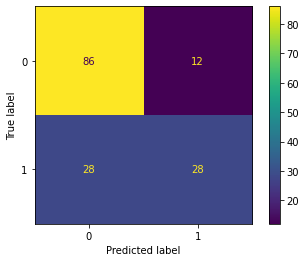

In [11]:
plot_confusion_matrix(model, X_test, y_test)

In [12]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
recall = TP / (TP + FN)
print("sensitivity/recall: ", recall)

# Calculate and print the specificity
precision = TP / (TP + FP)
print("precision: ", precision)

# Calculate and print the F1 score
F1 = (2 * precision * recall)/(precision + recall)
print("F1: ", F1)

accuracy:  0.7402597402597403
sensitivity/recall:  0.5
precision:  0.7
F1:  0.5833333333333334


## 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

Ways to assess the performance of the model aside from accuracy are: precision, recall, and F1 score. The confusion matrix and classification report are used to evaluate the performance. 
Precision (aka positive predictive value) is the accuracy of positive predictions. It tells me what percent of my predictions were correct. Precision is the ability of a classifier not to label an instance positive that is actually negative.
Recall (aka  sensitivity or true positive rate) is the fraction of positives that were correctly identified. Is asks what percent of the positive cases did you catch.
The F1 score measures the test's accuracy. A maximum score of 1 is perfect precsion and recall. it measures the overall preciseness and robustness of your model.

Based on the correlation matrix and classification table, the model correctly predicted 86 people do not have diabetes, and 28 do have diabetes. 12 are false positives and 28 are false negatives. 
Accuracy score is 74%
Precision score is 70% 
Recall score is 50%

The approach that makes the most sense for diabetes dataset is recall. You want the recall of a diabetes detection model to be as close to 100% as possible. It’s better to have a person with no diabetes be misdiagnosed as having diabetes in comparison to the opposite.

## 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

#### Tuning the model for recall

In [33]:
#instatiate Logistic Regression Model
model = LogisticRegression()

# adding parameters to a dictionary so that grid cv can choose the best parameters for the model
parameters = {"penalty": ["l1", "l2", "elasticnet", "none"],
        "class_weight": ["balances", "none"],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

#import grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters)

#best_clf will hold the values of the fit
best_clf = clf.fit(X, y)
print(best_clf)

#will print the best parameters for logistic regression
# the class_weight = 'balances' and solver =  'newton-cg' are the parameters to use to tune the model performance

print(best_clf.best_estimator_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balances', 'none'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})
LogisticRegression(class_weight='balances', solver='newton-cg')


In [32]:
#check the accuracy with the parameters from above
# this score is an improvement with the parameters
best_clf.score(X, y)

0.78125

## 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?


The logistic regression model is more performant for thediabetes dataset because the accuracy score is higher. The logistic regression model's accuracy score is 74% and for KNN the accuracy score is 72%.

In [13]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# independent/explanatory variables
X = diabetes_df.drop('Outcome', axis=1)
#dependent variables
y = diabetes_df['Outcome']

In [16]:
#splitting the model
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

#Standardize for knn
ss = StandardScaler()
X_train = ss.fit_transform(X_train_knn)
X_test = ss.fit_transform(X_test_knn)

#### KNN

In [17]:
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
# https://www.kaggle.com/kavita5/diabetic-predication-knn-missing-value-imputation
#https://www.kaggle.com/phoenixsp/diabetes-classification
from sklearn.neighbors import KNeighborsClassifier

#setting n_neighbors to 8 for the features in the dataset
knn = KNeighborsClassifier(n_neighbors=8)

# fitting the knn model
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=8)

In [18]:
#KNN Training Accuracy score
print(knn.score(X_train_knn, y_train_knn))

#KNN Test Accuracy score
print(knn.score(X_test_knn, y_test_knn))

0.7785016286644951
0.7207792207792207


In [19]:
knn_pred= knn.predict(X_test_knn)

In [20]:
# KNN Confusion Matrix
con_matrix = confusion_matrix(y_test_knn, knn_pred)
con_matrix

array([[84, 16],
       [27, 27]])

In [21]:
# KNN Classification table
print(classification_report(y_test_knn, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



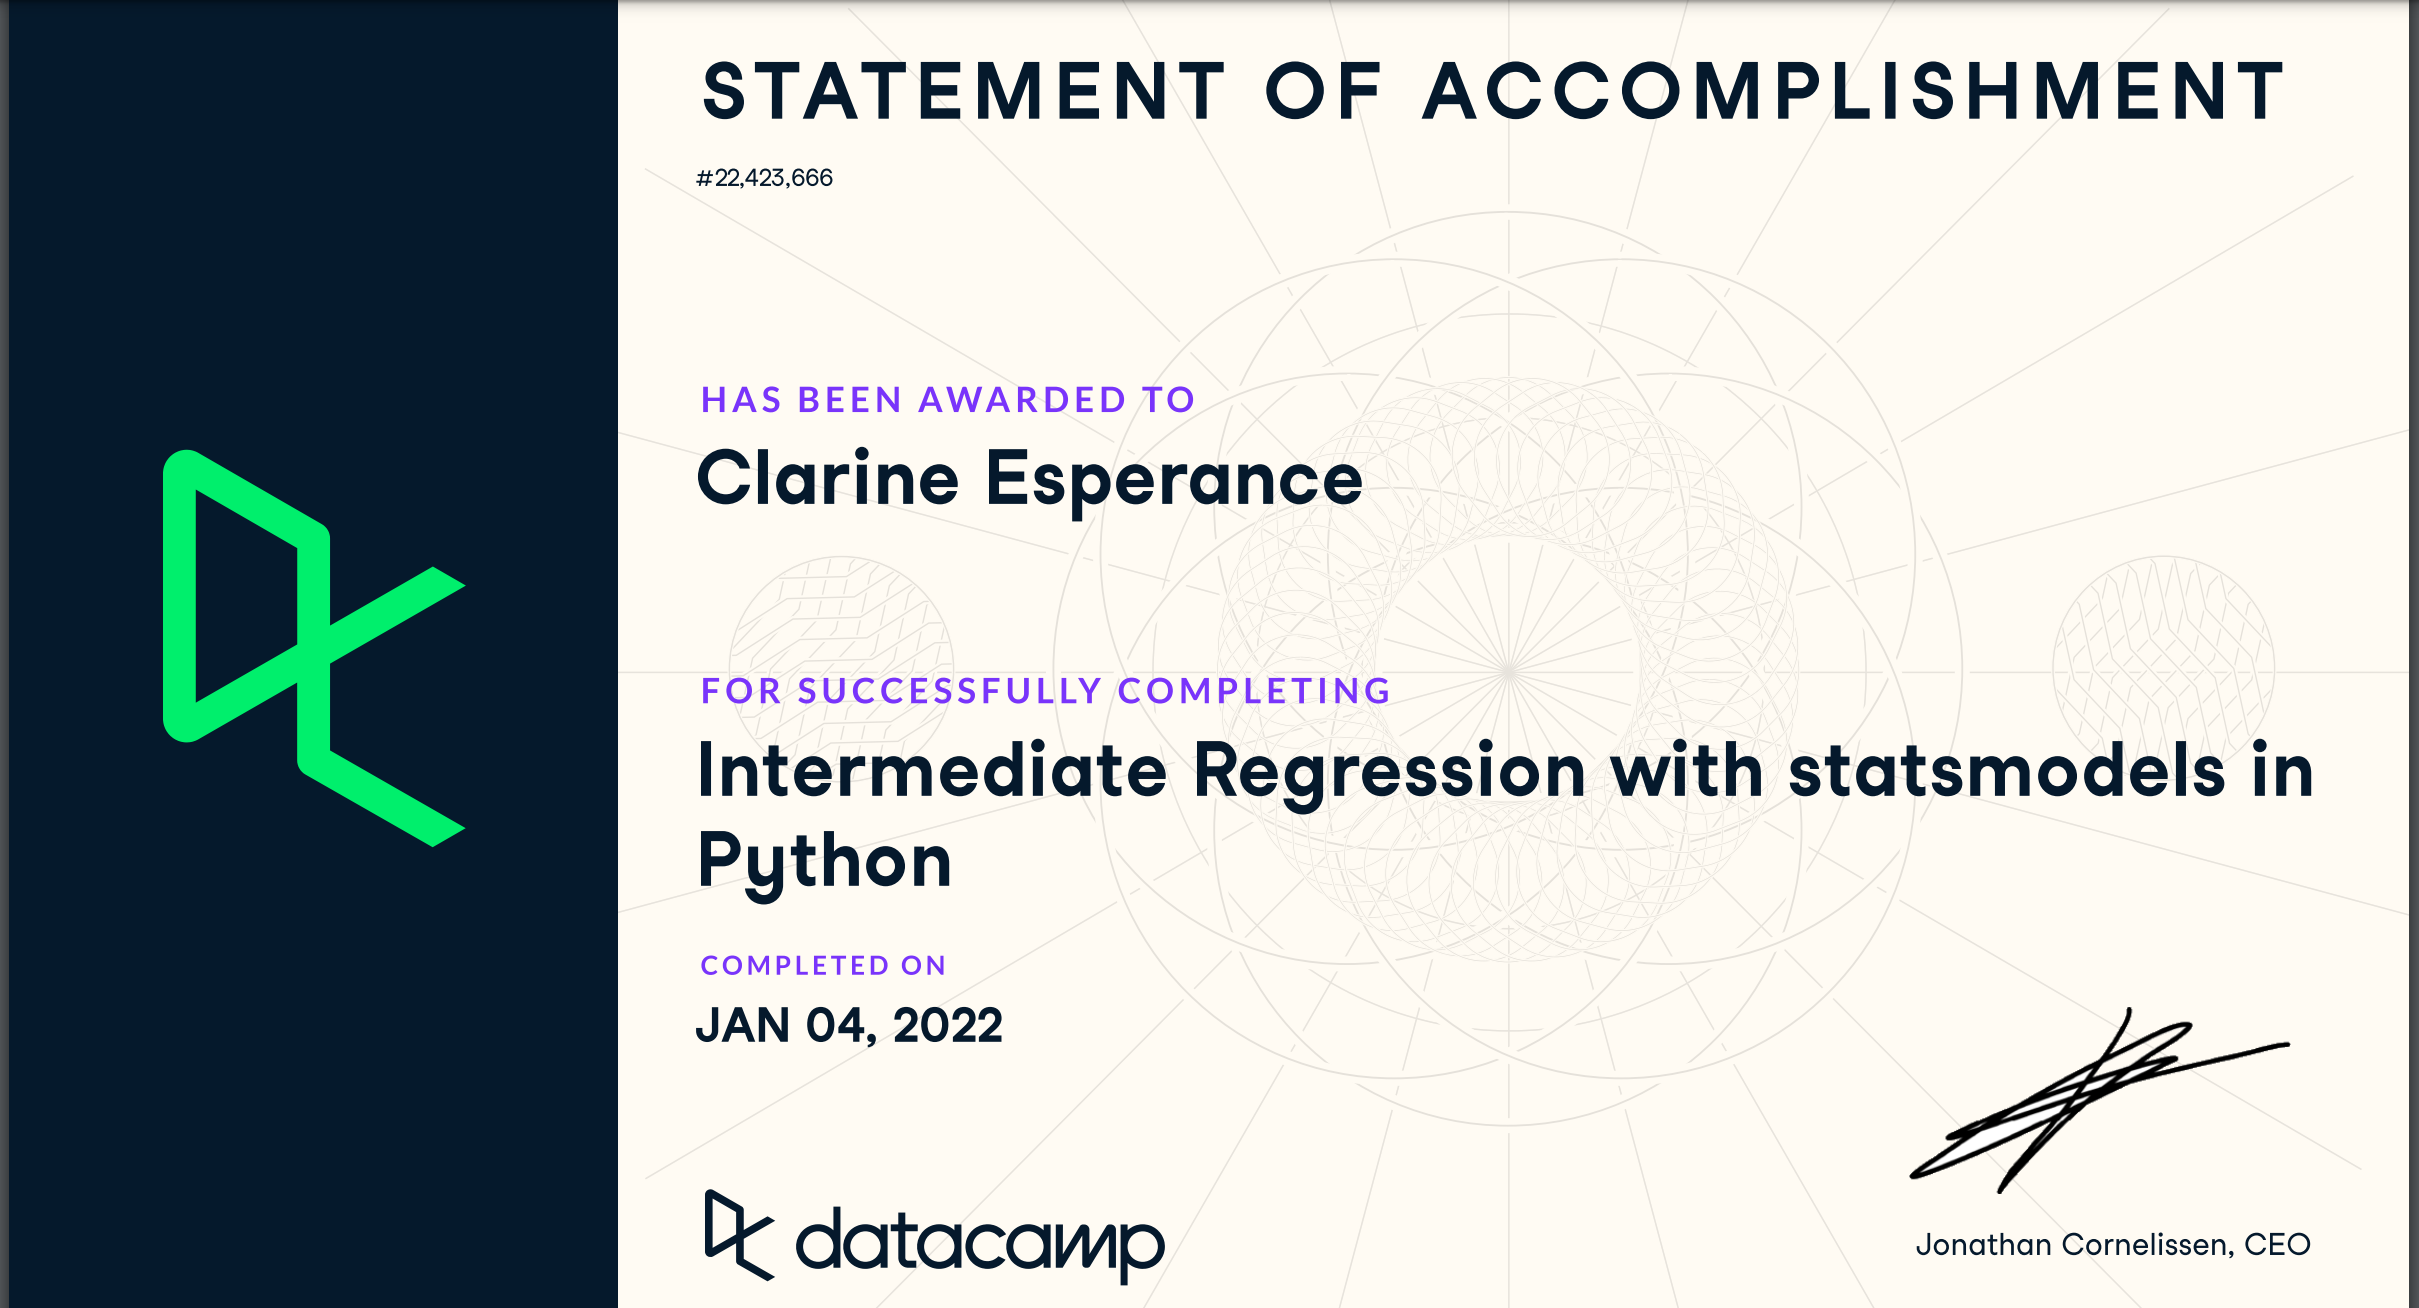